# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read twitter archive with Pandas
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request_images = requests.get(url, allow_redirects=True)

# Save tsv to a file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(request_images.content)

In [4]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Make an empty list to store data extracted from the JSON file
json_data = []

# Open the JSON file and iterate through all lines
with open("tweet-json.txt", 'r') as file:
    for line in file:
        line_data = json.loads(line)
        
        # Extracting the columns
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
        full_text = line_data["full_text"]
        
        # Extract dog's name from sentence
        dog_name_sentence = re.search('([Tt]his is\s\w+)', full_text) or re.search('([Mm]eet\s\w+)', full_text)
        dog_name = ""
        
        # Check that our search returned a name
        if(dog_name_sentence):
            dog_name = dog_name_sentence.group().split()[-1]
        
        # Add extracted data to the empty list
        json_data.append({'tweet_id': tweet_id, 
                          'favorite_count': favorite_count, 
                          'retweet_count': retweet_count,
                          'name': dog_name
                         })
        
# Caonstruct a dataframe with the constructed list to be neatly displayed 
df3 = pd.DataFrame(json_data, columns=["tweet_id", "name", "favorite_count", "retweet_count"])

df3.head()


,tweet_id,name,favorite_count,retweet_count
0,892420643555336193,Phineas,39467,8853
1,892177421306343426,Tilly,33819,6514
2,891815181378084864,Archie,25461,4328
3,891689557279858688,Darla,42908,8964
4,891327558926688256,Franklin,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### Inspecting twitter-archive-enhanced.csv

In [6]:
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [7]:
df.tail(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
# Summary of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Display null items in all columns
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
# Display duplicates
df.duplicated().sum()

0

In [11]:
list(df.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

##### Inspecting image-predictions.tsv

In [12]:
df2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df2.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
df2.duplicated().sum()

0

##### Inspecting tweet-json.txt

In [17]:
df3.head(5)

,tweet_id,name,favorite_count,retweet_count
0,892420643555336193,Phineas,39467,8853
1,892177421306343426,Tilly,33819,6514
2,891815181378084864,Archie,25461,4328
3,891689557279858688,Darla,42908,8964
4,891327558926688256,Franklin,41048,9774


In [18]:
df3.tail(5)

,tweet_id,name,favorite_count,retweet_count
2349,666049248165822465,,111,41
2350,666044226329800704,a,311,147
2351,666033412701032449,,128,47
2352,666029285002620928,a,132,48
2353,666020888022790149,,2535,532


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   name            2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [20]:
df3.duplicated().sum()

0

In [21]:
df3.isnull().sum()

tweet_id          0
name              0
favorite_count    0
retweet_count     0
dtype: int64

In [22]:
df.tweet_id


0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

### Quality issues
>- 1. Extract URLS from hyperlinks in the source column

>- 2. Some columns should be renamed for clarity

>- 3. Some values in the `name` column includes invalid strings such as `a`, `an`, and `the` which can be replaced with 'None'

>- 4. Erroneous data types (`tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp` have to be object not integer/float, `timestamp` and  `retweeted_status_timestamp` must be converted into datetime not to remain as an object datatype)

>- 5. Incorrect format in `expanded_urls` 

>- 6. Missing entries in the `retweeted status id`, `retweeted status user id`, and other columns, as well as the removal of duplicate tweets (retweets).

>- 7. Convert 'None' input into NULL objects

>- 8. p1 has underscores that seperates words, and words did not start with capital letters

>- 9. Extract ratings correctly

### Tidiness issues
>- 1. A column `dog_stages` should contain values merged from `doggo`,	`floofer`,	`pupper` and `puppo`  columns in twitter-archive-enhanced table. 

>- 2. Cleaned `twitter-archive-enhanced`, `image-predictions` and `tweet_json` dataframes are to be merged 

## Cleaning Data
In this section, I am going to clean **all** of the issues documented while assessing. 

But before anything, I'm going to make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). Resulting in a high-quality and tidy master pandas DataFrame.

In [23]:
# Make copies of original pieces of data
archive_clean = df.copy()
prediction_clean = df2.copy()
json_clean = df3.copy()

## Solving Quality Issues 

### Issue #1:  Extract URLS from hyperlinks in the source column

>- Define: I will execute an extraction using extract and pattern

#### Code

In [24]:
# Extract URLs from hyperlinks
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
archive_clean.source = archive_clean.source.str.extract(pattern, expand=False)

#### Test

In [25]:
archive_clean.sample(6) # All hyperlinks are gone 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
714,784057939640352768,NaN,NaN,2016-10-06 15:49:14 +0000,http://vine.co,This is Balto. He's very content. Legendary to...,NaN,NaN,NaN,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None,None,None,None
400,824775126675836928,NaN,NaN,2017-01-27 00:24:48 +0000,http://twitter.com/download/iphone,This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,None,None,None,None
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,http://twitter.com/download/iphone,Idk why this keeps happening. We only rate dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,http://twitter.com/download/iphone,Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,http://twitter.com/download/iphone,This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,None,None,pupper,None
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18 +0000,http://twitter.com/download/iphone,Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None


### Issue #2: Some columns should be renamed for clarity

>- Define: Renaming columns will give a perfect desciption of the columns

#### Code

In [26]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
json_clean.name # I am going to drop this column later on

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2349            
2350           a
2351            
2352           a
2353            
Name: name, Length: 2354, dtype: object

In [29]:
prediction_clean.rename(columns={'img_num': 'image_number', 
                           'p1': 'prediction1_names', 
                           'p2': 'prediction2_names', 
                           'p3': 'prediction3_names', 
                           'p1_conf': 'prediction1_confidence',
                           'p1_dog': 'prediction1_boolean',
                           'p2_conf': 'prediction2_confidence',
                           'p2_dog': 'prediction2_boolean',
                           'p3_conf': 'prediction3_confidence',
                           'p3_dog': 'prediction3_boolean'}, inplace=True)

#### Test

In [30]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   jpg_url                 2075 non-null   object 
 2   image_number            2075 non-null   int64  
 3   prediction1_names       2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_boolean     2075 non-null   bool   
 6   prediction2_names       2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_boolean     2075 non-null   bool   
 9   prediction3_names       2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_boolean     2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #3: Some values in the `name` column includes invalid strings such as `a`, `an`, and `the` which can be replaced with 'None'.

>- Define: Invalid strings, inappropriate for names are reeplaced with None

#### Code

In [31]:
# Locating invalid strings
strings = archive_clean.name.str.contains('^[a-z]', regex =True)

In [32]:
# Replace strings with 'None'
archive_clean['name'] = archive_clean['name'].replace(archive_clean[strings].name.values.tolist(), 'None')

#### Test

In [33]:
archive_clean['name'].value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Issue #4: Erroneous data types (`tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp` have to be object not integer/float, `timestamp` and  `retweeted_status_timestamp` must be converted into datetime not to remain as an object datatype)

>- Define: Specified columns above are replaced with their appropriate datatypes.

#### Code

In [34]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('object')
prediction_clean.tweet_id = prediction_clean.tweet_id.astype('object')
json_clean.tweet_id = json_clean.tweet_id.astype('object')
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype('object')
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype('object')
archive_clean.source = archive_clean.source.astype("category")
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [35]:
# Observe changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5: Incorrect format in `expanded_urls`.


>- Define: expanded_urls are not in the correct format, the function will parse a row to return the URL pattern used by Twitter 

#### Code

>- tweet url fixing

In [36]:
def fix_url(row):
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'

archive_clean.expanded_urls = archive_clean.apply(lambda row: fix_url(row), axis=1)
archive_clean.rename(columns={"expanded_urls":"expanded_url"})

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_url,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


#### Test

In [37]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23+00:00,http://twitter.com/download/iphone,Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39+00:00,http://twitter.com/download/iphone,This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
1772,678278586130948096,NaN,NaN,2015-12-19 18:19:51+00:00,http://twitter.com/download/iphone,Another spooky pupper here. Most definitely fl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678278586...,10,10,None,None,None,pupper,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47+00:00,http://twitter.com/download/iphone,This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
958,751456908746354688,NaN,NaN,2016-07-08 16:44:23+00:00,http://twitter.com/download/iphone,Here's a pupper that's very hungry but too laz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751456908...,12,10,None,None,None,pupper,None


### Issue #6: Missing entries in the `retweeted status id`, `retweeted status user id`, and other columns, as well as the removal of duplicate tweets (retweets).

>- Define: I will remove retweeted and reply rows

#### Code

In [38]:
archive_clean.loc[archive_clean['text'].str.contains("RT @dog_rates:", case=False)] # Locate rows with Retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,http://twitter.com/download/iphone,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/888202515...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,http://twitter.com/download/iphone,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/885311592...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,http://twitter.com/download/iphone,RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/879130579...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,http://twitter.com/download/iphone,RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,https://twitter.com/dog_rates/status/878404777...,13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33+00:00,http://twitter.com/download/iphone,RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/878316110...,11,10,Terrance,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,752701944171524096,NaN,NaN,2016-07-12 03:11:42+00:00,http://twitter.com/download/iphone,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.835159e+17,4.196984e+09,2016-01-03 05:11:12 +0000,https://twitter.com/dog_rates/status/752701944...,11,10,None,None,None,None,None
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51+00:00,http://twitter.com/download/iphone,RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/752309394...,13,10,None,None,None,None,None
1012,747242308580548608,NaN,NaN,2016-06-27 01:37:04+00:00,http://twitter.com/download/iphone,RT @dog_rates: This pupper killed this great w...,7.047611e+17,4.196984e+09,2016-03-01 20:11:59 +0000,https://twitter.com/dog_rates/status/747242308...,13,10,None,None,None,pupper,None
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,http://twitter.com/download/iphone,RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/746521445...,10,10,Shaggy,None,None,None,None


In [39]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [40]:
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]

In [41]:
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [42]:
archive_clean.loc[archive_clean['text'].str.contains("RT @dog_rates:", case=False)] # Retweets has been removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [43]:
archive_clean.sample(9)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16+00:00,http://twitter.com,This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
1349,704134088924532736,NaN,NaN,2016-02-29 02:40:23+00:00,http://vine.co,This sneezy pupper is just adorable af. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704134088...,12,10,None,None,None,pupper,None
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10+00:00,http://twitter.com/download/iphone,Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725458796...,13,10,None,None,None,None,None
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10+00:00,http://twitter.com/download/iphone,This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None
105,872122724285648897,NaN,NaN,2017-06-06 16:07:15+00:00,http://twitter.com/download/iphone,This is Kody. He's a baller. Wishes he was a l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872122724...,12,10,Kody,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41+00:00,http://twitter.com/download/iphone,This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
133,866720684873056260,NaN,NaN,2017-05-22 18:21:28+00:00,http://twitter.com/download/iphone,He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866720684...,13,10,None,None,None,None,None
224,849336543269576704,NaN,NaN,2017-04-04 19:03:06+00:00,http://twitter.com/download/iphone,At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,None,None,None,None
2325,666418789513326592,NaN,NaN,2015-11-17 00:53:15+00:00,http://twitter.com/download/iphone,This is Walter. He is an Alaskan Terrapin. Lov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666418789...,10,10,Walter,None,None,None,None


### Issue #7: Convert 'None' input into NULL objects

>- Define: For columns, like name and dog stages, there are some values of "None" which are treated as strings. They should be NULL objects instead. It with be replaced using `np.nan`.

#### Code

In [44]:
archive_clean.name.value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

In [45]:
archive_clean.name.replace('None', np.nan, inplace=True)
archive_clean.doggo.replace('None', np.nan, inplace=True)
archive_clean.floofer.replace('None', np.nan, inplace=True)
archive_clean.pupper.replace('None', np.nan, inplace=True)
archive_clean.puppo.replace('None', np.nan, inplace=True)

#### Test

In [46]:
archive_clean.sample(5) # Observe the change

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2023,671896809300709376,NaN,NaN,2015-12-02 03:40:57+00:00,http://twitter.com/download/iphone,This is Lola. She fell asleep on a piece of pi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,NaN,NaN,NaN,NaN
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,http://twitter.com/download/iphone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,NaN,NaN,pupper,NaN
133,866720684873056260,NaN,NaN,2017-05-22 18:21:28+00:00,http://twitter.com/download/iphone,He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866720684...,13,10,NaN,NaN,NaN,NaN,NaN
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03+00:00,http://twitter.com/download/iphone,This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,NaN,NaN,NaN,NaN
1974,673148804208660480,NaN,NaN,2015-12-05 14:35:56+00:00,http://twitter.com/download/iphone,This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,NaN,NaN,pupper,NaN


### Issue #8: p1 has underscores that seperates words, and words did not start with capital letters

>- Define:  Remove "_" by replacing them with " " (empty string), and capitalize the first letter of each word of the resulting text.

#### Code

In [47]:
# Previously p1 has been replaced with prediction1_names
prediction_clean["prediction1_names"] = prediction_clean["prediction1_names"].str.replace("_"," ").str.title()

#### Test

In [48]:
prediction_clean.sample(5)

,tweet_id,jpg_url,image_number,prediction1_names,prediction1_confidence,prediction1_boolean,prediction2_names,prediction2_confidence,prediction2_boolean,prediction3_names,prediction3_confidence,prediction3_boolean
356,672604026190569472,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,1,Toy Poodle,0.820158,True,miniature_poodle,0.178404,True,toilet_tissue,0.000291,False
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan Terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,Golden Retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,Vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
1232,746056683365994496,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1,Shetland Sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True


### Issue #9: Extract ratings correctly 

>- Define: The `rating numerator` column should be of the type float and extracted appropriately. When looking at the twitter enhanced.csv file, you'll notice on row 46 that the tweet's correct rating is 13.5 but it's extracted as 5. There are a lot more issues like this in the dataset. As a result, it must be evacuated and cleaned properly.

#### Code

In [49]:
archive_clean.iloc[[45]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11+00:00,http://twitter.com/download/iphone,This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,NaN,NaN,NaN,NaN


In [50]:
pd.options.display.max_colwidth = 200
archive_clean.iloc[[45]].text

48    This is Rusty. He wasn't ready for the first pic. Clearly puppared for the second. 13/10 confirmed great boy https://t.co/tyER0KpdXj
Name: text, dtype: object

In [51]:
# Discover mistakes in ratings
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\trust\AppData\Local\Temp\ipykernel_12736\3624388055.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [52]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [53]:
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [54]:
archive_clean.rating_numerator = ratings[0]

In [55]:
# Change data type to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

#### Test

In [56]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\trust\AppData\Local\Temp\ipykernel_12736\119780846.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [57]:
archive_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                   category
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                          float64
rating_denominator                        float64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

## Solving Tidiness Issues

### Issue #1:  A column `dog_stages` should contain values merged from `doggo`,	`floofer`,	`pupper` and `puppo`  columns in twitter-archive-enhanced table. 

>- Define: Remove the original columns and combine the four columns into one to retain the dog stage value. The four values will be added together and saved in a new column.

#### Code

In [58]:
# Merging four coulumns into a single column
archive_clean['stages_of_dog'] = archive_clean[archive_clean.columns[13:]].apply(lambda y: ','.join(y.dropna().astype(str)), axis=1)
# Dropping the other four columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [59]:
# Replacing the empty values of the 'stages_of_dog' column with np.nan
archive_clean['stages_of_dog'] = archive_clean['stages_of_dog'].replace(r'^\s*$', np.nan, regex=True)

#### Test

In [60]:
archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages_of_dog
1416,698635131305795584,NaN,NaN,2016-02-13 22:29:29+00:00,http://twitter.com/download/iphone,Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131305795584/photo/1,12.0,10.0,NaN,NaN
507,812709060537683968,NaN,NaN,2016-12-24 17:18:34+00:00,http://twitter.com/download/iphone,This is Brandi and Harley. They are practicing their caroling for later. Both 12/10 festive af https://t.co/AbBDuGZUpp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812709060537683968/photo/1,12.0,10.0,Brandi,NaN
1950,673688752737402881,NaN,NaN,2015-12-07 02:21:29+00:00,http://twitter.com/download/iphone,Meet Larry. He doesn't know how to shoe. 9/10 damn it Larry https://t.co/jMki5GOV3y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673688752737402881/photo/1,9.0,10.0,Larry,NaN
1309,707059547140169728,NaN,NaN,2016-03-08 04:25:07+00:00,http://twitter.com/download/iphone,Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707059547140169728/photo/1,11.0,10.0,Cupcake,NaN
1240,712085617388212225,NaN,NaN,2016-03-22 01:16:55+00:00,http://twitter.com/download/iphone,Say hello to Olive and Ruby. They are best buddies. Both 11/10 \n1 like = 1 buddy https://t.co/yagmFdKlyL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712085617388212225/photo/1,11.0,10.0,Olive,NaN
1947,673700254269775872,NaN,NaN,2015-12-07 03:07:12+00:00,http://twitter.com/download/iphone,Large blue dog here. Cool shades. Flipping us off w both hands. Obviously a preteen. 3/10 for rude blue preteen pup https://t.co/mcPd5AFfhA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673700254269775872/photo/1,3.0,10.0,NaN,NaN
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16+00:00,http://twitter.com/download/iphone,This is Chadrick. He's gnarly af 13/10 https://t.co/447tyBN0mW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130620620800/photo/1,13.0,10.0,Chadrick,NaN
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38+00:00,http://twitter.com/download/iphone,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280114372609/photo/1,7.0,10.0,NaN,NaN
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08+00:00,http://twitter.com/download/iphone,This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emotional farewell on camera. 12/10 https://t.co/jTe7Y6P0HK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633769889797/photo/1,12.0,10.0,Tucker,NaN
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39+00:00,http://twitter.com/download/iphone,This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442703122432/photo/1,10.0,10.0,Bernie,NaN


### Issue #2: Cleaned `twitter-archive-enhanced`, `image-predictions` and `tweet_json` dataframes are to be merged 

>- Define: The dataframes `twitter-archive-enhanced`, `image-predictions`, and `tweet json`, will be combined when they have been cleaned.

#### Code

In [61]:
from functools import reduce

# define list of DataFrames
'''drop name column from the json_clean dataframe as specified 
earlier to prevent the seperation of name columns in dataframe [json_clean, and archive_clean]'''
json_clean.drop(['name'], axis=1, inplace=True)
dfs = [archive_clean, prediction_clean, json_clean]

In [62]:
# merge all DataFrames into one

final_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), dfs)

c:\Users\trust\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\trust\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


#### Test

In [63]:
# view merged DataFrame
final_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stages_of_dog', 'jpg_url',
       'image_number', 'prediction1_names', 'prediction1_confidence',
       'prediction1_boolean', 'prediction2_names', 'prediction2_confidence',
       'prediction2_boolean', 'prediction3_names', 'prediction3_confidence',
       'prediction3_boolean', 'favorite_count', 'retweet_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
final_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualizations

In [65]:
df = pd.read_csv('twitter_archive_master.csv')
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stages_of_dog', 'jpg_url',
       'image_number', 'prediction1_names', 'prediction1_confidence',
       'prediction1_boolean', 'prediction2_names', 'prediction2_confidence',
       'prediction2_boolean', 'prediction3_names', 'prediction3_confidence',
       'prediction3_boolean', 'favorite_count', 'retweet_count'],
      dtype='object')

In [80]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction1_confidence,prediction1_boolean,prediction2_names,prediction2_confidence,prediction2_boolean,prediction3_names,prediction3_confidence,prediction3_boolean,favorite_count,retweet_count
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558926688256/photo/1,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    3111 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      float64
 9   expanded_urls               2175 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        1391 non-null   object 
 13  stages_of_dog               344 n

In [68]:
df.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
3106     NaN
3107     NaN
3108     NaN
3109     NaN
3110     NaN
Name: rating_numerator, Length: 3111, dtype: float64

In [69]:
df.rating_denominator

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
3106     NaN
3107     NaN
3108     NaN
3109     NaN
3110     NaN
Name: rating_denominator, Length: 3111, dtype: float64

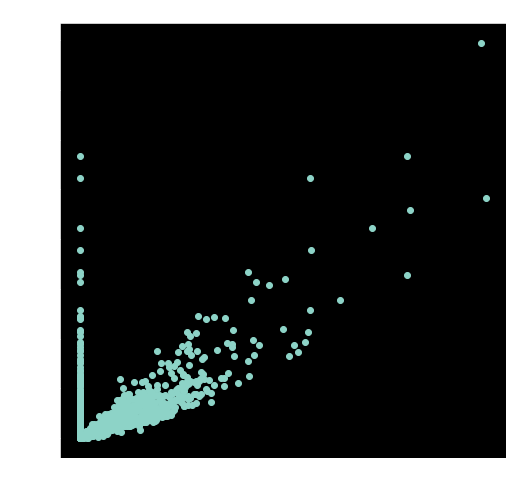

In [70]:
# Scatter plot
fig = plt.figure(figsize=(8, 8))
plt.scatter(df.favorite_count, df.retweet_count)
plt.title("Correlation between favorite count and retweet count")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")
plt.show();

In [71]:
df.groupby(['favorite_count']).max().tail(5)

C:\Users\trust\AppData\Local\Temp\ipykernel_12736\2273885184.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(['favorite_count']).max().tail(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,image_number,prediction1_confidence,prediction1_boolean,prediction2_confidence,prediction2_boolean,prediction3_confidence,prediction3_boolean,retweet_count
favorite_count,,,,,,,,,,,,,,,,
106827.0,8.664507e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32883.0
107015.0,8.071068e+17,NaN,NaN,NaN,NaN,NaN,13.0,10.0,1.0,0.50537,True,0.120358,True,0.077008,True,56625.0
107956.0,8.794158e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45849.0
131075.0,7.442348e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79515.0
132810.0,8.228729e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48265.0


In [72]:
df.groupby(['retweet_count']).max().tail(5)

C:\Users\trust\AppData\Local\Temp\ipykernel_12736\1032985853.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(['retweet_count']).max().tail(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,image_number,prediction1_confidence,prediction1_boolean,prediction2_confidence,prediction2_boolean,prediction3_confidence,prediction3_boolean,favorite_count
retweet_count,,,,,,,,,,,,,,,,
45849.0,8.794158e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107956.0
48265.0,8.228729e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132810.0
52360.0,7.707439e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75163.0
56625.0,8.428922e+17,NaN,NaN,NaN,NaN,NaN,13.0,10.0,1.0,0.50537,True,0.120358,True,0.077008,True,107015.0
79515.0,7.442348e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131075.0


In [73]:
df['favorite_count'].max()

132810.0

In [74]:
df['favorite_count'].min()

0.0

>- Dog Stages


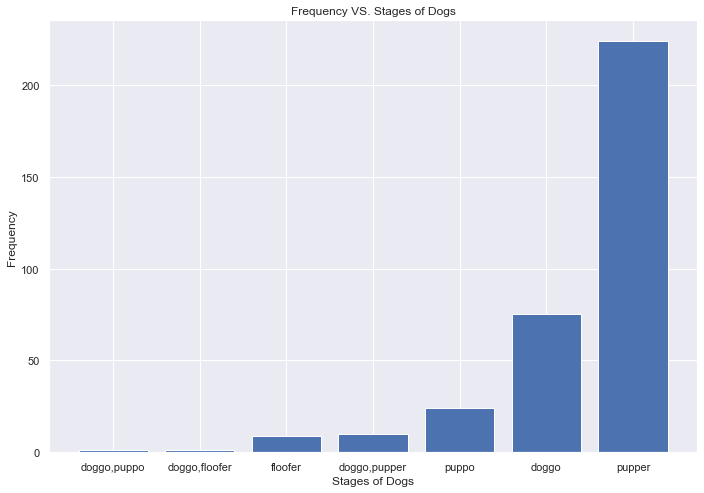

In [75]:
import seaborn as sns
sns.set()
length=list(df['stages_of_dog'].value_counts().sort_values())
width=list(df['stages_of_dog'].value_counts().sort_values().index)
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1.5])
ax.bar(width, length)
plt.xlabel("Stages of Dogs")
plt.ylabel("Frequency")
ax.set_title("Frequency VS. Stages of Dogs")
plt.show() # People love pupper (puppies) the most!

>- Common dog breeds

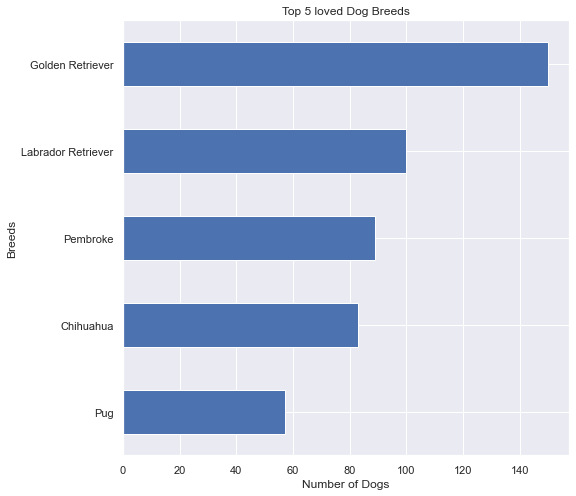

In [76]:
top_dog_breeds = df.prediction1_names.value_counts().nlargest(5)
top_dog_breeds.plot(kind="barh", figsize=(8,8));
plt.xlabel("Number of Dogs")
plt.ylabel("Breeds")
plt.title("Top 5 loved Dog Breeds")
plt.gca().invert_yaxis()
plt.show(); # People love Golden Retrievers!

### Insights:
1. The *`favorite_count`* column is the next insight I gained from the aforementioned datasets. The disparity between the most popular (favorite) tweet and the least popular (favorite) tweet among @dog rates admirers is enormous. Fans have liked (favored) the most liked tweet 132810 times, while the least liked tweet has no (0) likes. The most intriguing detail is that this tweet was about the dog breeds *`pupper`* and *`doggo`*. This suggests that fans are far more interested in these two types of dogs.

2. Also, the types or phases of dogs are one of the last insights I gained from the data sets above. After analyzing and displaying all of the data in the *stages of dogs* column, I discovered that the most common dog kinds are, predictably, *`pupper`* and *`doggo`*. The related visulization is shown above. The overall conclusion I came to as a result of this endeavor is that people adore dogs. This is also evidenced by the fact that @WeRateDogs has a large following on Twitter, with about 10 million followers.

3. Finally, about the dog breeds. We can observe that `Golden Retrievers` are mostly loved by majority in the barchart above specifying the top 5 loved dog breeds.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])